# Logistic Regression Exercises
In this exercise, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

For all of the models you create, choose a threshold that optimizes for accuracy.

Do your work for these exercises in either a notebook or a python script named model within your classification-exercises repository. Add, commit, and push your work.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import acquire

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print("Imports ready")

Imports ready


In [2]:
# importing and cleaning up data
titanic = acquire.get_titanic_data()

#fills age null with mode age, creates dummies, and drops unneeded columns
titanic = acquire.prep_titanic(titanic)
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,0,1
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,0,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,0,1
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,0,1


In [3]:
#checking nulls
titanic.isnull().sum(axis=0)

passenger_id    0
survived        0
pclass          0
sex             0
age             0
sibsp           0
parch           0
fare            0
embarked        0
class           0
embark_town     0
alone           0
Q               0
S               0
dtype: int64

In [4]:
# prep from curriculum
X1 = titanic[['pclass','fare']]
y1 = titanic[['survived']]

X1_train_validate, X1_test, y1_train_validate, y1_test = train_test_split(X1, y1, test_size = .20, random_state = 123)

X1_train, X1_validate, y1_train, y1_validate = train_test_split(X1_train_validate, y1_train_validate, test_size = .30, random_state = 123)

print("train: ", X1_train.shape, ", validate: ", X1_validate.shape, ", test: ", X1_test.shape)
print("train: ", y1_train.shape, ", validate: ", y1_validate.shape, ", test: ", y1_test.shape)

train:  (497, 2) , validate:  (214, 2) , test:  (178, 2)
train:  (497, 1) , validate:  (214, 1) , test:  (178, 1)


In [5]:
# More zeros, which means most did not survive
y1_train.survived.value_counts()

0    313
1    184
Name: survived, dtype: int64

In [6]:
# Our baseline model will be that every passenger does not survive
models = pd.DataFrame(y1_train)
models['baseline'] = 0

models.columns = ['actual','baseline']
models.head()

,actual,baseline
689,1,0
191,0,0
634,0,0
623,0,0
244,0,0


In [7]:
# cross tab of our baseline versus actual
pd.crosstab(models['baseline'], models['actual'])

actual,0,1
baseline,,
0,313,184


In [8]:
# let's calculate the accuracy
# positive will be not survived
# (TP + TN) / (TP + TN + FP + FN)
true_p = 313
false_p = 184
true_n = 0
false_n = 0

base_acc = (true_p + true_n) / (true_p + true_n + false_p + false_n)
base_acc
print("The baseline model is",round(base_acc * 100, 2),"percent.")

The baseline model is 62.98 percent.


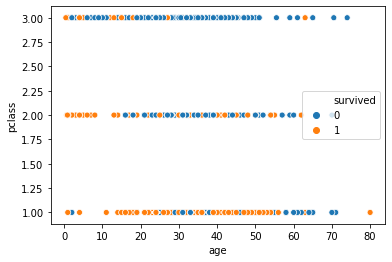

In [123]:
sns.scatterplot(titanic.age, titanic.pclass, hue=titanic.survived)

### 1. Create another model that includes age in addition to fare and pclass. Does this model perform better than your previous one (the baseline model)?

# Steps
- Create Basic Model

    1. Create model object

    2. Fit the model to the data

    3. Predict labels

    4. Estimate probability of a label estimate

- Evaluate Model

    1. Accuracy

    2. Classification report

    3. Confusion Matrix

In [9]:
X2 = titanic[['pclass','fare','age']]
y2 = titanic[['survived']]

X2_train_validate, X2_test, y2_train_validate, y2_test = train_test_split(X2, y2, test_size = .20, random_state = 123)

X2_train, X2_validate, y2_train, y2_validate = train_test_split(X2_train_validate, y2_train_validate, test_size = .30, random_state = 123)

print("train: ", X2_train.shape, ", validate: ", X2_validate.shape, ", test: ", X2_test.shape)
print("train: ", y2_train.shape, ", validate: ", y2_validate.shape, ", test: ", y2_test.shape)

train:  (497, 3) , validate:  (214, 3) , test:  (178, 3)
train:  (497, 1) , validate:  (214, 1) , test:  (178, 1)


## Create Basic Model

### Create Logistic Regression Object

In [10]:
# from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=1, random_state=123)

### Fit Model to the Data

In [11]:
logit.fit(X2_train, y2_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Print the coefficients and intercept of the model

In [12]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-0.97715693  0.00434782 -0.03720437]]
Intercept: 
 [2.59154884]


### Estimate whether or not a passenger would survive, using the training data

In [13]:
y2_pred = logit.predict(X2_train)

### Estimate the probability of a passenger surviving, using the training data

In [14]:
y2_pred_proba = logit.predict_proba(X2_train)

## Evaluate Model on Train

### Compute the accuracy

In [15]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logit.score(X2_train, y2_train)))

Accuracy of Logistic Regression classifier on training set: 0.72


### Create a confusion matrix

In [16]:
print("Confusion Matrix for Model 1\n",confusion_matrix(y2_train, y2_pred))

Confusion Matrix for Model 1
 [[278  35]
 [103  81]]


### Compute Precision, Recall, F1-score, and Support

In [17]:
print(classification_report(y2_train, y2_pred))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       313
           1       0.70      0.44      0.54       184

    accuracy                           0.72       497
   macro avg       0.71      0.66      0.67       497
weighted avg       0.72      0.72      0.70       497



In [18]:
from sklearn.metrics import accuracy_score

model2_acc = accuracy_score(y2_train, y2_pred)
print('The accuracy of model 2 is',round(model2_acc * 100, 2), 'percent.')

The accuracy of model 2 is 72.23 percent.


### 2. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

#### Adding the sex feature, and adjusting the weights of c

In [19]:
# create dummy variables for sex
df_dummies = pd.get_dummies(titanic['sex'],drop_first=True)
    
#add dummy variables to original df
titanic = pd.concat([titanic, df_dummies], axis=1)

#check to see it was added correctly
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S,male
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,0,1,1
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,0,1,0
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,0,1,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,0,1,1


In [20]:
X3 = titanic[['pclass','fare','age','male']]
y3 = titanic[['survived']]

X3_train_validate, X3_test, y3_train_validate, y3_test = train_test_split(X3, y3, test_size = .20, random_state = 123)

X3_train, X3_validate, y3_train, y3_validate = train_test_split(X3_train_validate, y3_train_validate, test_size = .30, random_state = 123)

print("train: ", X3_train.shape, ", validate: ", X3_validate.shape, ", test: ", X3_test.shape)
print("train: ", y3_train.shape, ", validate: ", y3_validate.shape, ", test: ", y3_test.shape)

train:  (497, 4) , validate:  (214, 4) , test:  (178, 4)
train:  (497, 1) , validate:  (214, 1) , test:  (178, 1)


In [230]:
#Create Logistic Regression Object
# from sklearn.linear_model import LogisticRegression
logit3 = LogisticRegression(C=1, random_state=123)

In [231]:
#Fit Model to the Data
logit3.fit(X3_train, y3_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [232]:
# Print the coefficients and intercept of the model
print('Coefficient: \n', logit3.coef_)
print('Intercept: \n', logit3.intercept_)

Coefficient: 
 [[-1.08363353e+00  1.73245998e-03 -3.16663020e-02 -2.16797714e+00]]
Intercept: 
 [4.0654252]


In [233]:
# Estimate whether or not a passenger would survive, using the training data
y3_pred = logit3.predict(X3_train)

In [234]:
# Estimate the probability of a passenger surviving, using the training data
y3_pred_proba = logit3.predict_proba(X3_train)

In [235]:
# Evaluate Model on Train
# Compute the accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logit.score(X3_train, y3_train)))

Accuracy of Logistic Regression classifier on training set: 0.77


In [236]:
model3_acc = accuracy_score(y3_train, y3_pred)
print('The accuracy of model 3 is',round(model3_acc * 100, 2), 'percent.')

The accuracy of model 3 is 77.26 percent.


#### Notes
- Model 1 c=1
- Model 2 c=.01 and sex added
- Accuracy of Model 1 and 2 are the same at .37
- The baseline model is still more accurate than both these models at .67

### 3. Try out other combinations of features and models.

- Will try using features that make the most sense - the person being a child, female, and rich making them most likely to survive
    - age < 13
    - pclass == 1
    - sex == 0 (female)

In [28]:
#adding columns to the titanic df, then will split into train,test,validate
train_titanic = titanic
train_titanic['is_child'] = (train_titanic.age < 12)
train_titanic['is_first_class'] = (train_titanic.pclass == 1)

#create dummy variables for sex column
df_dummies = pd.get_dummies(train_titanic['sex'],drop_first=1)
    
#add dummy variables to original df
train_titanic = pd.concat([train_titanic, df_dummies], axis=1)

train_titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S,male,is_child,is_first_class,male
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,0,1,1,False,False,1
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0,0,0,False,True,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,0,1,0,False,False,0
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,0,1,0,False,True,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,0,1,1,False,False,1


In [29]:
#dropping columns we don't need
train_titanic = train_titanic.drop(['passenger_id','pclass','sex','age','embark_town'],axis=1)
train_titanic.head()

,survived,sibsp,parch,fare,embarked,class,alone,Q,S,male,is_child,is_first_class,male
0,0,1,0,7.2500,S,Third,0,0,1,1,False,False,1
1,1,1,0,71.2833,C,First,0,0,0,0,False,True,0
2,1,0,0,7.9250,S,Third,1,0,1,0,False,False,0
3,1,1,0,53.1000,S,First,0,0,1,0,False,True,0
4,0,0,0,8.0500,S,Third,1,0,1,1,False,False,1


In [30]:
# choosing features and splitting into train, validate, test
# first, let's just test survival by female, child, and first_class
X4 = train_titanic[['is_child','male','is_first_class']]
y4 = train_titanic[['survived']]

X4_train_validate, X4_test, y4_train_validate, y4_test = train_test_split(X4, y4, test_size = .20, random_state = 123)

X4_train, X4_validate, y4_train, y4_validate = train_test_split(X4_train_validate, y4_train_validate, test_size = .30, random_state = 123)

print("train: ", X4_train.shape, ", validate: ", X4_validate.shape, ", test: ", X4_test.shape)
print("train: ", y4_train.shape, ", validate: ", y4_validate.shape, ", test: ", y4_test.shape)

train:  (497, 4) , validate:  (214, 4) , test:  (178, 4)
train:  (497, 1) , validate:  (214, 1) , test:  (178, 1)


In [89]:
# Create Basic Model
# Create Logistic Regression Object
# from sklearn.linear_model import LogisticRegression
logit4 = LogisticRegression(C=1, random_state=123)

In [90]:
#Fit Model to the Data
logit4.fit(X4_train, y4_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
#Print the coefficients and intercept of the model
print('Coefficient: \n', logit4.coef_)
print('Intercept: \n', logit4.intercept_)

Coefficient: 
 [[ 0.81407221 -1.11579946 -1.11579946  1.5282524 ]]
Intercept: 
 [0.36144037]


In [92]:
# Estimate whether or not a passenger would survive, using the training data
y4_pred = logit4.predict(X4_train)

In [93]:
# Estimate the probability of a passenger surviving, using the training data
y_pred_proba = logit4.predict_proba(X4_train)

In [94]:
#Evaluate Model on Train
#Compute the accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logit4.score(X4_train, y4_train)))

Accuracy of Logistic Regression classifier on training set: 0.77


In [95]:
#Accuracy of Logistic Regression classifier on training set: 0.37
#Create a confusion matrix
print("Confusion Matrix for Model 1\n",confusion_matrix(y4_train, y4_pred))

Confusion Matrix for Model 1
 [[260  53]
 [ 62 122]]


In [96]:
#Compute Precision, Recall, F1-score, and Support
print(classification_report(y4_train, y4_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       313
           1       0.70      0.66      0.68       184

    accuracy                           0.77       497
   macro avg       0.75      0.75      0.75       497
weighted avg       0.77      0.77      0.77       497



In [97]:
from sklearn.metrics import accuracy_score
model4_acc = accuracy_score(y4_train, y4_pred)

print('The accuracy of model 3 is',round(model4_acc * 100, 2), 'percent.')

The accuracy of model 3 is 76.86 percent.


- Changing c from 1 to .01 decreased accuracy
- Increasing c to 10, 100 has no effect on accuracy
- Changing features specifically to first class, female, children did not increase accuracy
- will try to only account for children

### Let's try the same features but without is_child

In [124]:
# choosing features and splitting into train, validate, test
# first, let's just test survival by female, child, and first_class
X5 = train_titanic[['male','is_first_class']]
y5 = train_titanic[['survived']]

X5_train_validate, X5_test, y5_train_validate, y5_test = train_test_split(X5, y5, test_size = .20, random_state = 123)

X5_train, X5_validate, y5_train, y5_validate = train_test_split(X5_train_validate, y5_train_validate, test_size = .30, random_state = 123)

print("train: ", X5_train.shape, ", validate: ", X5_validate.shape, ", test: ", X5_test.shape)
print("train: ", y5_train.shape, ", validate: ", y5_validate.shape, ", test: ", y5_test.shape)

train:  (497, 3) , validate:  (214, 3) , test:  (178, 3)
train:  (497, 1) , validate:  (214, 1) , test:  (178, 1)


In [125]:
# Create Basic Model
# Create Logistic Regression Object
# from sklearn.linear_model import LogisticRegression
logit5 = LogisticRegression(C=1, random_state=123)

In [126]:
#Fit Model to the Data
logit5.fit(X5_train, y5_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
#Print the coefficients and intercept of the model
print('Coefficient: \n', logit5.coef_)
print('Intercept: \n', logit5.intercept_)

Coefficient: 
 [[-1.13193462 -1.13193462  1.44382804]]
Intercept: 
 [0.47332721]


In [128]:
# Estimate whether or not a passenger would survive, using the training data
y5_pred = logit5.predict(X5_train)

In [132]:
#Accuracy of Logistic Regression classifier on training set: 0.37
#Create a confusion matrix
print("Confusion Matrix for Model 1\n",confusion_matrix(y5_train, y5_pred))

Confusion Matrix for Model 1
 [[260  53]
 [ 62 122]]


In [130]:
#Evaluate Model on Train
#Compute the accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logit5.score(X5_train, y5_train)))

Accuracy of Logistic Regression classifier on training set: 0.77


In [131]:
#Compute Precision, Recall, F1-score, and Support
print(classification_report(y5_train, y5_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       313
           1       0.70      0.66      0.68       184

    accuracy                           0.77       497
   macro avg       0.75      0.75      0.75       497
weighted avg       0.77      0.77      0.77       497



In [133]:
model5_acc = accuracy_score(y5_train, y5_pred)

print('The accuracy of model 5 is',round(model5_acc * 100, 2), 'percent.')

The accuracy of model 5 is 76.86 percent.


- Accuracy did not change when dropping the age feature

### For our next model, let's add more features instead of less
- age, pclass, gender, fare, alone

In [139]:
# choosing features and splitting into train, validate, test
# first, let's just test survival by female, child, and first_class
X6 = titanic[['age','male','pclass','alone']]
y6 = titanic[['survived']]

X6_train_validate, X6_test, y6_train_validate, y6_test = train_test_split(X6, y6, test_size = .20, random_state = 123)

X6_train, X6_validate, y6_train, y6_validate = train_test_split(X6_train_validate, y6_train_validate, test_size = .30, random_state = 123)

print("train: ", X6_train.shape, ", validate: ", X6_validate.shape, ", test: ", X6_test.shape)
print("train: ", y6_train.shape, ", validate: ", y6_validate.shape, ", test: ", y6_test.shape)

train:  (497, 4) , validate:  (214, 4) , test:  (178, 4)
train:  (497, 1) , validate:  (214, 1) , test:  (178, 1)


In [212]:
# Create Basic Model
# Create Logistic Regression Object
# from sklearn.linear_model import LogisticRegression
logit6 = LogisticRegression(C=1, random_state=123)

In [213]:
#Fit Model to the Data
logit6.fit(X6_train, y6_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [214]:
#Print the coefficients and intercept of the model
print('Coefficient: \n', logit6.coef_)
print('Intercept: \n', logit6.intercept_)

Coefficient: 
 [[-0.03074817 -2.13996862 -1.1226487  -0.1564343 ]]
Intercept: 
 [4.25691469]


In [215]:
# Estimate whether or not a passenger would survive, using the training data
y6_pred = logit6.predict(X6_train)

In [216]:
#Accuracy of Logistic Regression classifier on training set: 0.37
#Create a confusion matrix
print("Confusion Matrix for Model 1\n",confusion_matrix(y6_train, y6_pred))

Confusion Matrix for Model 1
 [[266  47]
 [ 68 116]]


In [217]:
#Evaluate Model on Train
#Compute the accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logit6.score(X6_train, y6_train)))

Accuracy of Logistic Regression classifier on training set: 0.77


In [218]:
model6_acc = accuracy_score(y6_train, y6_pred)

print('The accuracy of model 5 is',round(model6_acc * 100, 2), 'percent.')

The accuracy of model 5 is 76.86 percent.


### Let's use all the features

In [219]:
titanic.head(1)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S,male,is_child,is_first_class
0,0,0,3,male,22.0,1,0,7.25,S,Third,Southampton,0,0,1,1,False,False


In [220]:
# choosing features and splitting into train, validate, test
# first, let's just test survival by female, child, and first_class
X7 = titanic[['pclass','age','sibsp','parch','fare','alone','Q','S','male']]
y7 = titanic[['survived']]

X7_train_validate, X7_test, y7_train_validate, y7_test = train_test_split(X7, y7, test_size = .20, random_state = 123)

X7_train, X7_validate, y7_train, y7_validate = train_test_split(X7_train_validate, y7_train_validate, test_size = .30, random_state = 123)

print("train: ", X6_train.shape, ", validate: ", X6_validate.shape, ", test: ", X6_test.shape)
print("train: ", y6_train.shape, ", validate: ", y6_validate.shape, ", test: ", y6_test.shape)

train:  (497, 4) , validate:  (214, 4) , test:  (178, 4)
train:  (497, 1) , validate:  (214, 1) , test:  (178, 1)


In [221]:
# Create Basic Model
# Create Logistic Regression Object
# from sklearn.linear_model import LogisticRegression
logit7 = LogisticRegression(C=1, random_state=123)

In [222]:
#Fit Model to the Data
logit7.fit(X7_train, y7_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [223]:
#Print the coefficients and intercept of the model
print('Coefficient: \n', logit7.coef_)
print('Intercept: \n', logit7.intercept_)

Coefficient: 
 [[-1.02544004e+00 -3.44915225e-02 -4.41728767e-01 -5.52839933e-02
   1.43137209e-03 -7.63632322e-01  9.25335626e-02 -3.63917168e-01
  -2.13536220e+00]]
Intercept: 
 [4.96870432]


In [224]:
# Estimate whether or not a passenger would survive, using the training data
y7_pred = logit7.predict(X7_train)

In [225]:
#Accuracy of Logistic Regression classifier on training set: 0.37
#Create a confusion matrix
print("Confusion Matrix for Model 1\n",confusion_matrix(y7_train, y7_pred))

Confusion Matrix for Model 1
 [[270  43]
 [ 63 121]]


In [226]:
#Evaluate Model on Train
#Compute the accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logit7.score(X7_train, y7_train)))

Accuracy of Logistic Regression classifier on training set: 0.79


In [227]:
model7_acc = accuracy_score(y7_train, y7_pred)

print('The accuracy of model 7 is',round(model7_acc * 100, 2), 'percent.')

The accuracy of model 7 is 78.67 percent.


### 4. Use your best 3 models to predict and evaluate on your validate sample.

In [228]:
print('Baseline accuracy is', round(base_acc * 100,2),'percent.')
print('Model 2 accuracy is', round(model2_acc * 100,2),'percent.')
print('Model 3 accuracy is', round(model3_acc * 100,2),'percent.')
print('Model 4 accuracy is', round(model4_acc * 100,2),'percent.')
print('Model 5 accuracy is', round(model5_acc * 100,2),'percent.')
print('Model 6 accuracy is', round(model6_acc * 100,2),'percent.')
print('Model 7 accuracy is', round(model7_acc * 100,2),'percent.')

Baseline accuracy is 62.98 percent.
Model 2 accuracy is 72.23 percent.
Model 3 accuracy is 77.26 percent.
Model 4 accuracy is 76.86 percent.
Model 5 accuracy is 76.86 percent.
Model 6 accuracy is 76.86 percent.
Model 7 accuracy is 78.67 percent.


# Let's evaluate Models 3,4,7

In [249]:
y_pred1 = logit3.predict(X3_validate)
y_pred2 = logit4.predict(X4_validate)
y_pred3 = logit7.predict(X7_validate)

# Model 3
print("Model 1: features = ['pclass','fare','age','male'], c = 1")

print('Accuracy: {:.2f}'.format(logit3.score(X3_validate, y3_validate)))

print(confusion_matrix(y3_validate, y_pred1))

print(classification_report(y3_validate, y_pred1))

#Model 4
print("Model 2: features = ['is_child','male','is_first_class'], c = 1")

print('Accuracy: {:.2f}'.format(logit4.score(X4_validate, y4_validate)))

print(confusion_matrix(y4_validate, y_pred2))

print(classification_report(y4_validate, y_pred2))

#Model 7
print("Model 3: features = ['pclass','age','sibsp','parch','fare','alone','Q','S','male'], c = 1")

print('Accuracy: {:.2f}'.format(logit7.score(X7_validate, y7_validate)))

print(confusion_matrix(y1_validate, y_pred3))

print(classification_report(y1_validate, y_pred3))

Model 1: features = ['pclass','fare','age','male'], c = 1
Accuracy: 0.84
[[114  16]
 [ 18  66]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       130
           1       0.80      0.79      0.80        84

    accuracy                           0.84       214
   macro avg       0.83      0.83      0.83       214
weighted avg       0.84      0.84      0.84       214

Model 2: features = ['is_child','male','is_first_class'], c = 1
Accuracy: 0.84
[[116  14]
 [ 20  64]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       130
           1       0.82      0.76      0.79        84

    accuracy                           0.84       214
   macro avg       0.84      0.83      0.83       214
weighted avg       0.84      0.84      0.84       214

Model 3: features = ['pclass','age','sibsp','parch','fare','alone','Q','S','male'], c = 1
Accuracy: 0.86
[[119  11]
 [ 20  64]]
              precis

### 5. Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

In [250]:
# Choosing Model 7 as the best predicting survived and not survived
y_pred3 = logit7.predict(X7_test)
y_pred_proba = logit7.predict_proba(X7_test)

print("Model 1: solver = lbfgs, c = 1")

print('Accuracy: {:.2f}'.format(logit7.score(X7_test, y7_test)))

print(confusion_matrix(y7_test, y_pred3))

print(classification_report(y7_test, y_pred3))

Model 1: solver = lbfgs, c = 1
Accuracy: 0.78
[[92 14]
 [25 47]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       106
           1       0.77      0.65      0.71        72

    accuracy                           0.78       178
   macro avg       0.78      0.76      0.77       178
weighted avg       0.78      0.78      0.78       178



- performed the best on the validate stage
- performed similar accuracy during train and evaluate
- overall, it performed better than the baseline (aka best guess)

# Bonus

- Bonus1 How do different strategies for handling the missing values in the age column affect model performance?

- Bonus2: How do different strategies for encoding sex affect model performance?

- Bonus3: scikit-learn's LogisticRegression classifier is actually applying a regularization penalty to the coefficients by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the C hyper parameter. Small values of C correspond to a larger penalty, and large values of C correspond to a smaller penalty.
    - Try out the following values for C and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected.
    - C = .01, .1, 1, 10, 100, 1000
- Bonus Bonus: how does scaling the data interact with your choice of C?

# Decision Tree Exercises

- In this exercise, we'll continue working with the titanic dataset and building logistic regression models.
- Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. 
- The test dataset should only be used for your final model.

## 1. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [424]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

print('Tree imports complete.')

Tree imports complete.


In [425]:
titanic.head(1)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S,male,is_child,is_first_class
0,0,0,3,male,22.0,1,0,7.25,S,Third,Southampton,0,0,1,1,False,False


In [426]:
# prep from curriculum
X_tree = titanic[['pclass','male','age','fare','alone']]
y_tree = titanic[['survived']]

Xtree_train_validate, Xtree_test, ytree_train_validate, ytree_test = train_test_split(X_tree, y_tree, test_size = .20, random_state = 123)

Xtree_train, Xtree_validate, ytree_train, ytree_validate = train_test_split(Xtree_train_validate, ytree_train_validate, test_size = .30, random_state = 123)

print("train: ", Xtree_train.shape, ", validate: ", Xtree_validate.shape, ", test: ", Xtree_test.shape)
print("train: ", ytree_train.shape, ", validate: ", ytree_validate.shape, ", test: ", ytree_test.shape)

train:  (497, 5) , validate:  (214, 5) , test:  (178, 5)
train:  (497, 1) , validate:  (214, 1) , test:  (178, 1)


In [427]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [428]:
clf.fit(Xtree_train, ytree_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [429]:
ytree_pred = clf.predict(Xtree_train)
ytree_pred[0:5]

array([1, 0, 0, 0, 0])

In [430]:
ytree_pred_proba = clf.predict_proba(Xtree_train)
ytree_pred_proba

array([[0.01785714, 0.98214286],
       [0.87804878, 0.12195122],
       [0.68421053, 0.31578947],
       [0.87804878, 0.12195122],
       [0.87804878, 0.12195122],
       [0.33333333, 0.66666667],
       [0.87804878, 0.12195122],
       [0.01785714, 0.98214286],
       [0.1       , 0.9       ],
       [0.01785714, 0.98214286],
       [0.11428571, 0.88571429],
       [0.11428571, 0.88571429],
       [0.87804878, 0.12195122],
       [0.63492063, 0.36507937],
       [1.        , 0.        ],
       [0.87804878, 0.12195122],
       [0.87804878, 0.12195122],
       [0.63492063, 0.36507937],
       [0.87804878, 0.12195122],
       [0.87804878, 0.12195122],
       [0.11428571, 0.88571429],
       [0.87804878, 0.12195122],
       [0.63492063, 0.36507937],
       [0.87804878, 0.12195122],
       [0.87804878, 0.12195122],
       [0.87804878, 0.12195122],
       [0.63492063, 0.36507937],
       [0.01785714, 0.98214286],
       [0.87804878, 0.12195122],
       [0.87804878, 0.12195122],
       [0.

## 2. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [431]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(Xtree_train, ytree_train)))

Accuracy of Decision Tree classifier on training set: 0.83


In [432]:
print('Confusion Matrix of Decision Tree Classifier:')
confusion_matrix(ytree_train, ytree_pred)

Confusion Matrix of Decision Tree Classifier:


array([[298,  15],
       [ 71, 113]])

In [433]:
print(classification_report(ytree_train, ytree_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       313
           1       0.88      0.61      0.72       184

    accuracy                           0.83       497
   macro avg       0.85      0.78      0.80       497
weighted avg       0.84      0.83      0.82       497



## 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [434]:
ytree_pred
ytree_train.size

497

In [435]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [436]:
TN, FP, FN, TP = confusion_matrix(ytree_train, ytree_pred).ravel()

In [437]:
# Accuracy is the rate of correct predictions
accuracy1= accuracy_score(ytree_pred, ytree_train)
acc1= ((TP + TN) / (TP + TN + FP + FN))

# Recall is the true positive rate
recall1=recall_score(ytree_train, ytree_pred)
rec1= (TP / (TP + FN))

# False positive rate
fp_rate1= (FP / (FP + TN))

# Specificity is the true negative rate
spec1= (TN /(TN + FP))

# False negative rate
fn_rate1= (FN / (FN + TN))

# Precision is the psitive pedictive value
prec1= (TP / (TP + FP))

# f1-score
f_score1= f1_score(ytree_train, ytree_pred)
#F1 = 2 * (prec * recall) / (prec + recall)

# Support is the number of occurrences of each class in y_true
support1= precision_recall_fscore_support(ytree_train, ytree_pred)[-1]

print(f'''
Accuracy: \n__________{round(accuracy1,2)}
true positive rate: \n____________________{round(recall1,2)}
false positive rate: \n____________________{round(fp_rate1,2)}
true negative rate: \n____________________{round(spec1,2)}
false negative rate: \n____________________{round(fn_rate1,2)}
precision: \n__________{round(prec1,2)}
recall: \n_______{round(recall1,2)}
f1-score: \n_________{round(f_score1,2)}
support: \n________{support1}
''')


Accuracy: 
__________0.83
true positive rate: 
____________________0.61
false positive rate: 
____________________0.05
true negative rate: 
____________________0.95
false negative rate: 
____________________0.19
precision: 
__________0.88
recall: 
_______0.61
f1-score: 
_________0.72
support: 
________[313 184]



## 4. Run through steps 2-4 using a different max_depth value. 

## This time, we will change the depth to 4 instead of 3

In [438]:
clf2 = DecisionTreeClassifier(max_depth=4, random_state=123)

In [439]:
clf2.fit(Xtree_train, ytree_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [440]:
ytree_pred = clf2.predict(Xtree_train)
ytree_pred[0:5]

array([1, 0, 0, 0, 0])

In [441]:
ytree_pred_proba = clf.predict_proba(Xtree_train)
ytree_pred_proba

array([[0.01785714, 0.98214286],
       [0.87804878, 0.12195122],
       [0.68421053, 0.31578947],
       [0.87804878, 0.12195122],
       [0.87804878, 0.12195122],
       [0.33333333, 0.66666667],
       [0.87804878, 0.12195122],
       [0.01785714, 0.98214286],
       [0.1       , 0.9       ],
       [0.01785714, 0.98214286],
       [0.11428571, 0.88571429],
       [0.11428571, 0.88571429],
       [0.87804878, 0.12195122],
       [0.63492063, 0.36507937],
       [1.        , 0.        ],
       [0.87804878, 0.12195122],
       [0.87804878, 0.12195122],
       [0.63492063, 0.36507937],
       [0.87804878, 0.12195122],
       [0.87804878, 0.12195122],
       [0.11428571, 0.88571429],
       [0.87804878, 0.12195122],
       [0.63492063, 0.36507937],
       [0.87804878, 0.12195122],
       [0.87804878, 0.12195122],
       [0.87804878, 0.12195122],
       [0.63492063, 0.36507937],
       [0.01785714, 0.98214286],
       [0.87804878, 0.12195122],
       [0.87804878, 0.12195122],
       [0.

In [442]:
print('Accuracy of Decision Tree classifier on training set with Depth of 4: {:.2f}'
     .format(clf2.score(Xtree_train, ytree_train)))

Accuracy of Decision Tree classifier on training set with Depth of 4: 0.84


In [443]:
print('Confusion Matrix of Decision Tree Classifier Model 2:')
confusion_matrix(ytree_train, ytree_pred)

Confusion Matrix of Decision Tree Classifier Model 2:


array([[298,  15],
       [ 64, 120]])

In [444]:
print(classification_report(ytree_train, ytree_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       313
           1       0.89      0.65      0.75       184

    accuracy                           0.84       497
   macro avg       0.86      0.80      0.82       497
weighted avg       0.85      0.84      0.83       497



In [445]:
TN, FP, FN, TP = confusion_matrix(ytree_train, ytree_pred).ravel()

In [446]:
# Accuracy is the rate of correct predictions
accuracy2 = accuracy_score(ytree_pred, ytree_train)
acc2 = ((TP + TN) / (TP + TN + FP + FN))

# Recall is the true positive rate
recall2= recall_score(ytree_train, ytree_pred)
rec2 = (TP / (TP + FN))

# False positive rate
fp_rate2 = (FP / (FP + TN))

# Specificity is the true negative rate
spec2 = (TN /(TN + FP))

# False negative rate
fn_rate2 = (FN / (FN + TN))

# Precision is the psitive pedictive value
prec2 = (TP / (TP + FP))

# f1-score
f_score2 = f1_score(ytree_train, ytree_pred)
F1 = 2 * (prec * recall) / (prec + recall)

# Support is the number of occurrences of each class in y_true
support2 = precision_recall_fscore_support(ytree_train, ytree_pred)[-1]

print(f'''
Accuracy: \n__________{round(accuracy2,2)}
true positive rate: \n____________________{round(recall2,2)}
false positive rate: \n____________________{round(fp_rate2,2)}
true negative rate: \n____________________{round(spec2,2)}
false negative rate: \n____________________{round(fn_rate2,2)}
precision: \n__________{round(prec2,2)}
recall: \n_______{round(recall2,2)}
f1-score: \n_________{round(f_score2,2)}
support: \n________{support2}
''')


Accuracy: 
__________0.84
true positive rate: 
____________________0.65
false positive rate: 
____________________0.05
true negative rate: 
____________________0.95
false negative rate: 
____________________0.18
precision: 
__________0.89
recall: 
_______0.65
f1-score: 
_________0.75
support: 
________[313 184]



## This time we will change the depth to 5 instead of 3 and 4

In [447]:
clf3 = DecisionTreeClassifier(max_depth=5, random_state=123)

In [448]:
clf3.fit(Xtree_train, ytree_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [449]:
ytree_pred = clf3.predict(Xtree_train)
ytree_pred[0:5]

array([1, 0, 0, 0, 0])

In [450]:
ytree_pred_proba = clf.predict_proba(Xtree_train)

print('Accuracy of Decision Tree classifier on training set with Depth of 4: {:.2f}'
     .format(clf2.score(Xtree_train, ytree_train)))

print('\nConfusion Matrix of Decision Tree Classifier Model 2:')
confusion_matrix(ytree_train, ytree_pred)

print('\n',classification_report(ytree_train, ytree_pred))

Accuracy of Decision Tree classifier on training set with Depth of 4: 0.84

Confusion Matrix of Decision Tree Classifier Model 2:

               precision    recall  f1-score   support

           0       0.82      0.97      0.89       313
           1       0.93      0.63      0.75       184

    accuracy                           0.85       497
   macro avg       0.87      0.80      0.82       497
weighted avg       0.86      0.85      0.84       497



In [451]:
TN, FP, FN, TP = confusion_matrix(ytree_train, ytree_pred).ravel()

In [452]:
# Accuracy is the rate of correct predictions
accuracy3 = accuracy_score(ytree_pred, ytree_train)
acc3 = ((TP + TN) / (TP + TN + FP + FN))

# Recall is the true positive rate
recall3= recall_score(ytree_train, ytree_pred)
rec3 = (TP / (TP + FN))

# False positive rate
fp_rate3 = (FP / (FP + TN))

# Specificity is the true negative rate
spec3 = (TN /(TN + FP))

# False negative rate
fn_rate3 = (FN / (FN + TN))

# Precision is the psitive pedictive value
prec3 = (TP / (TP + FP))

# f1-score
f_score3 = f1_score(ytree_train, ytree_pred)
F1 = 2 * (prec * recall) / (prec + recall)

# Support is the number of occurrences of each class in y_true
support3 = precision_recall_fscore_support(ytree_train, ytree_pred)[-1]

print(f'''
Accuracy: \n__________{round(accuracy3,2)}
true positive rate: \n____________________{round(recall3,2)}
false positive rate: \n____________________{round(fp_rate3,2)}
true negative rate: \n____________________{round(spec3,2)}
false negative rate: \n____________________{round(fn_rate3,2)}
precision: \n__________{round(prec3,2)}
recall: \n_______{round(recall3,2)}
f1-score: \n_________{round(f_score3,2)}
support: \n________{support3}
''')


Accuracy: 
__________0.85
true positive rate: 
____________________0.63
false positive rate: 
____________________0.03
true negative rate: 
____________________0.97
false negative rate: 
____________________0.18
precision: 
__________0.93
recall: 
_______0.63
f1-score: 
_________0.75
support: 
________[313 184]



## 5. Which performs better on your in-sample data?

- Tested
    - Model 1 with Depth = 3
    - Model 2 with Depth = 4
    - Model 3 with Depth = 5
    
- While Model 3 seems the best, we must be careful of this being on overfit of the data

In [454]:
# model 1
print(f'''
Accuracy: \n{round(accuracy1,2)}
true positive rate: \n{round(recall1,2)}
false positive rate: \n{round(fp_rate1,2)}
true negative rate: \n{round(spec1,2)}
false negative rate: \n{round(fn_rate1,2)}
precision: \n{round(prec1,2)}
recall: \n{round(recall1,2)}
f1-score: \n{round(f_score1,2)}
support: \n{support1}
''')

# model 2
print(f'''
Accuracy: \n{round(accuracy2,2)}
true positive rate: \n{round(recall2,2)}
false positive rate: \n{round(fp_rate2,2)}
true negative rate: \n{round(spec2,2)}
false negative rate: \n{round(fn_rate2,2)}
precision: \n{round(prec2,2)}
recall: \n{round(recall2,2)}
f1-score: \n{round(f_score2,2)}
support: \n{support2}
''')

#model 2
print(f'''
Accuracy: \n{round(accuracy3,2)}
true positive rate: \n{round(recall3,2)}
false positive rate: \n{round(fp_rate3,2)}
true negative rate: \n{round(spec3,2)}
false negative rate: \n{round(fn_rate3,2)}
precision: \n{round(prec3,2)}
recall: \n{round(recall3,2)}
f1-score: \n{round(f_score3,2)}
support: \n{support3}
''')


Accuracy: 
0.83
true positive rate: 
0.61
false positive rate: 
0.05
true negative rate: 
0.95
false negative rate: 
0.19
precision: 
0.88
recall: 
0.61
f1-score: 
0.72
support: 
[313 184]


Accuracy: 
0.84
true positive rate: 
0.65
false positive rate: 
0.05
true negative rate: 
0.95
false negative rate: 
0.18
precision: 
0.89
recall: 
0.65
f1-score: 
0.75
support: 
[313 184]


Accuracy: 
0.85
true positive rate: 
0.63
false positive rate: 
0.03
true negative rate: 
0.97
false negative rate: 
0.18
precision: 
0.93
recall: 
0.63
f1-score: 
0.75
support: 
[313 184]



# Let's Visualize Model 1 Decision Tree

In [461]:
import graphviz

from graphviz import Graph

In [463]:
## need to install graphviz to anaconda
## example: 

clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf = clf.fit(X_tree, y_tree)

import graphviz

from graphviz import Graph

dot_data = export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True)

'titanic_decision_tree.pdf'

# Model 2

In [ ]:
## need to install graphviz to anaconda
## example: 

clf = DecisionTreeClassifier(max_depth=4, random_state=123)
clf = clf.fit(X_tree, y_tree)

import graphviz

from graphviz import Graph

dot_data = export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True)

# Model 3

In [466]:
## need to install graphviz to anaconda
## example: 

clf = DecisionTreeClassifier(max_depth=5, random_state=123)
clf = clf.fit(X_tree, y_tree)

import graphviz

from graphviz import Graph

dot_data = export_graphviz(clf, out_file=None, 
                           feature_names = X_tree.columns, 
                           class_names = {0:'not survived',1:'survived}'},
                          rounded=True,
                          filled=True) 
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True)

'titanic_decision_tree.pdf'

# Test Models on Validate

In [474]:
titanic.dtypes

passenger_id        int64
survived            int64
pclass              int64
sex                object
age               float64
sibsp               int64
parch               int64
fare              float64
embarked           object
class              object
embark_town        object
alone               int64
Q                   uint8
S                   uint8
male                uint8
is_child             bool
is_first_class       bool
dtype: object

# Random Forest Exercises

In [475]:
X_rf = titanic[['pclass','male','age','fare','alone']]
y_rf = titanic[['survived']]

Xrf_train_validate, Xrf_test, yrf_train_validate, yrf_test = train_test_split(X_rf, y_rf, test_size = .20, random_state = 123)

Xrf_train, Xrf_validate, yrf_train, yrf_validate = train_test_split(Xrf_train_validate, yrf_train_validate, test_size = .30, random_state = 123)

print("train: ", Xrf_train.shape, ", validate: ", Xrf_validate.shape, ", test: ", Xrf_test.shape)
print("train: ", yrf_train.shape, ", validate: ", yrf_validate.shape, ", test: ", yrf_test.shape)

train:  (497, 5) , validate:  (214, 5) , test:  (178, 5)
train:  (497, 1) , validate:  (214, 1) , test:  (178, 1)


In [476]:
from sklearn.ensemble import RandomForestClassifier

## 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 20.

In [499]:
rf = RandomForestClassifier(random_state=123, min_samples_leaf = 1, max_depth = 20)

In [500]:
rf.fit(Xrf_train, yrf_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [501]:
print(rf.feature_importances_)

[0.10188932 0.21528082 0.29625531 0.35705755 0.029517  ]


In [502]:
y_pred = rf.predict(Xrf_train)
y_pred_proba = rf.predict_proba(Xrf_train)

## 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [503]:
print('Accuracy of random forest classifier Model 1 on training set: {:.2f}'
     .format(rf.score(Xrf_train, yrf_train)))

print('\nConfusion Matrix of RF Model 1:')
print(confusion_matrix(yrf_train, y_pred))

print('\nClassification Report of RF Model 1:')
print(classification_report(yrf_train, y_pred))

Accuracy of random forest classifier Model 1 on training set: 0.98

Confusion Matrix of RF Model 1:
[[311   2]
 [  6 178]]

Classification Report of RF Model 1:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       313
           1       0.99      0.97      0.98       184

    accuracy                           0.98       497
   macro avg       0.98      0.98      0.98       497
weighted avg       0.98      0.98      0.98       497



## 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [504]:
TN, FP, FN, TP = confusion_matrix(yrf_train, y_pred).ravel()

# Accuracy is the rate of correct predictions
accuracy_rf = accuracy_score(y_pred, yrf_train)
acc_rf = ((TP + TN) / (TP + TN + FP + FN))

# Recall is the true positive rate
recall_rf = recall_score(yrf_train, y_pred)
rec_rf = (TP / (TP + FN))

# False positive rate
fp_rate_rf = (FP / (FP + TN))

# Specificity is the true negative rate
spec_rf = (TN /(TN + FP))

# False negative rate
fn_rate_rf = (FN / (FN + TN))

# Precision is the psitive pedictive value
prec_rf = (TP / (TP + FP))

# f1-score
f_score_rf = f1_score(yrf_train, y_pred)
F1_rf = 2 * (prec * recall) / (prec + recall)

# Support is the number of occurrences of each class in y_true
support_rf = precision_recall_fscore_support(ytree_train, ytree_pred)[-1]

In [505]:
# model 1
print(f'''
RF Model 1 stats
Accuracy: \n{round(accuracy_rf,2)}
true positive rate: \n{round(recall_rf,2)}
false positive rate: \n{round(fp_rate_rf,2)}
true negative rate: \n{round(spec_rf,2)}
false negative rate: \n{round(fn_rate_rf,2)}
precision: \n{round(prec_rf,2)}
recall: \n{round(recall_rf,2)}
f1-score: \n{round(f_score_rf,2)}
support: \n{support_rf}
''')


RF Model 1 stats
Accuracy: 
0.98
true positive rate: 
0.97
false positive rate: 
0.01
true negative rate: 
0.99
false negative rate: 
0.02
precision: 
0.99
recall: 
0.97
f1-score: 
0.98
support: 
[313 184]



## 4. Run through steps increasing your min_samples_leaf to 5 and decreasing your max_depth to 3.

In [506]:
rf2 = RandomForestClassifier(random_state=123, min_samples_leaf = 5, max_depth = 3)

rf2.fit(Xrf_train, yrf_train)

y_pred2 = rf2.predict(Xrf_train)

y_pred_proba2 = rf2.predict_proba(Xrf_train)

print('Accuracy of random forest classifier model 2 on training set: {:.2f}'
     .format(rf2.score(Xrf_train, yrf_train)))

print('\nConfusion Matrix of RF Model 2:')
print(confusion_matrix(yrf_train, y_pred2))

print('\nClassification Report of RF Model 2:')
print(classification_report(yrf_train, y_pred2))

Accuracy of random forest classifier model 2 on training set: 0.82

Confusion Matrix of RF Model 2:
[[299  14]
 [ 77 107]]

Classification Report of RF Model 2:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       313
           1       0.88      0.58      0.70       184

    accuracy                           0.82       497
   macro avg       0.84      0.77      0.78       497
weighted avg       0.83      0.82      0.81       497



## 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

- Model 1 performs better
    - higher accuracy, precision, recall
- Model 1 may be overfitted to the data
    - performs better in-sample because it is too specific for the data it is training for
- Max depth means more the splits it has and captures more information about the data
    - too much causes overfitting

## Additional Models

- min_samples_leaf is the minimum number of samples required to be at a leaf node
- min_samples_split represents the minimum number of samples required to split an internal node.
- n_estimators represents the number of trees in the forest

In [522]:
rf3 = RandomForestClassifier(random_state=123, min_samples_split = 5, min_samples_leaf = 5, max_depth = 5)

rf3.fit(Xrf_train, yrf_train)

y_pred3 = rf3.predict(Xrf_train)

y_pred_proba3 = rf3.predict_proba(Xrf_train)

print('Accuracy of random forest classifier model 3 on training set: {:.2f}'
     .format(rf3.score(Xrf_train, yrf_train)))

print('\nConfusion Matrix of RF Model 3:')
print(confusion_matrix(yrf_train, y_pred3))

print('\nClassification Report of RF Model 3:')
print(classification_report(yrf_train, y_pred3))

Accuracy of random forest classifier model 3 on training set: 0.84

Confusion Matrix of RF Model 3:
[[299  14]
 [ 64 120]]

Classification Report of RF Model 3:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       313
           1       0.90      0.65      0.75       184

    accuracy                           0.84       497
   macro avg       0.86      0.80      0.82       497
weighted avg       0.85      0.84      0.84       497



In [523]:
rf4 = RandomForestClassifier(random_state=123, min_samples_leaf = 5, min_samples_split = 10, max_depth = 3, n_estimators=10)

rf4.fit(Xrf_train, yrf_train)

y_pred4 = rf4.predict(Xrf_train)

y_pred_proba4 = rf4.predict_proba(Xrf_train)

print('Accuracy of random forest classifier model 4 on training set: {:.2f}'
     .format(rf4.score(Xrf_train, yrf_train)))

print('\nConfusion Matrix of RF Model 4:')
print(confusion_matrix(yrf_train, y_pred4))

print('\nClassification Report of RF Model 4:')
print(classification_report(yrf_train, y_pred4))

Accuracy of random forest classifier model 4 on training set: 0.80

Confusion Matrix of RF Model 4:
[[303  10]
 [ 88  96]]

Classification Report of RF Model 4:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       313
           1       0.91      0.52      0.66       184

    accuracy                           0.80       497
   macro avg       0.84      0.74      0.76       497
weighted avg       0.82      0.80      0.79       497



In [537]:
rf5 = RandomForestClassifier(random_state=123, min_samples_leaf = 5, min_samples_split = 10, max_depth = 10, n_estimators=200)

rf5.fit(Xrf_train, yrf_train)

y_pred5 = rf5.predict(Xrf_train)

y_pred_proba5 = rf5.predict_proba(Xrf_train)

print('Accuracy of random forest classifier model 5 on training set: {:.2f}'
     .format(rf5.score(Xrf_train, yrf_train)))

print('\nConfusion Matrix of RF Model 5:')
print(confusion_matrix(yrf_train, y_pred5))

print('\nClassification Report of RF Model 5:')
print(classification_report(yrf_train, y_pred5))

Accuracy of random forest classifier model 5 on training set: 0.87

Confusion Matrix of RF Model 5:
[[296  17]
 [ 49 135]]

Classification Report of RF Model 5:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       313
           1       0.89      0.73      0.80       184

    accuracy                           0.87       497
   macro avg       0.87      0.84      0.85       497
weighted avg       0.87      0.87      0.86       497



## 6. After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [539]:
print('Model 1:')
print('min_samples_leaf = 1, max_depth = 20')
print('Accuracy on Train:', rf.score(Xrf_train, yrf_train))

print('\nModel 2:')
print('min_samples_leaf = 5, max_depth = 3')
print('Accuracy on Train:', rf2.score(Xrf_train, yrf_train))

print('\nModel 3:')
print('min_samples_split = 5, min_samples_leaf = 5, max_depth = 5')
print('Accuracy on Train:', rf3.score(Xrf_train, yrf_train))

print('\nModel 4:')
print('min_samples_leaf = 5, min_samples_split = 10, max_depth = 3, n_estimators=10')
print('Accuracy on Train:', rf4.score(Xrf_train, yrf_train))

print('\nModel 5:')
print('min_samples_leaf = 5, min_samples_split = 10, max_depth = 10, n_estimators=200')
print('Accuracy on Train:', rf5.score(Xrf_train, yrf_train))

Model 1:
min_samples_leaf = 1, max_depth = 20
Accuracy on Train: 0.9839034205231388

Model 2:
min_samples_leaf = 5, max_depth = 3
Accuracy on Train: 0.8169014084507042

Model 3:
min_samples_split = 5, min_samples_leaf = 5, max_depth = 5
Accuracy on Train: 0.8430583501006036

Model 4:
min_samples_leaf = 5, min_samples_split = 10, max_depth = 3, n_estimators=10
Accuracy on Train: 0.8028169014084507

Model 5:
min_samples_leaf = 5, min_samples_split = 10, max_depth = 10, n_estimators=200
Accuracy on Train: 0.8672032193158954


In [541]:
# testing top 2 model and lowest model on validate data

#model 1
print('Accuracy of random forest classifier Model 1 on test set: {:.2f}'
     .format(rf.score(Xrf_validate, yrf_validate)))

#model 5
print('Accuracy of random forest classifier Model 5 on test set: {:.2f}'
     .format(rf5.score(Xrf_validate, yrf_validate)))

#model 4
print('Accuracy of random forest classifier Model 4 on test set: {:.2f}'
     .format(rf4.score(Xrf_validate, yrf_validate)))

Accuracy of random forest classifier Model 1 on test set: 0.82
Accuracy of random forest classifier Model 5 on test set: 0.85
Accuracy of random forest classifier Model 4 on test set: 0.81


- Model 5 was the most consistent from train to validate
- Model 1 was overfitted to the train data
- Model 4 was consistent from train to validate, but overal had a lower score than Model 5

# K Nearest Neighbors Exercises

## 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [542]:
X_Knn = titanic[['pclass','male','age','fare','alone']]
y_Knn = titanic[['survived']]

XKnn_train_validate, XKnn_test, yKnn_train_validate, yKnn_test = train_test_split(X_Knn, y_Knn, test_size = .20, random_state = 123)

XKnn_train, XKnn_validate, yKnn_train, yKnn_validate = train_test_split(XKnn_train_validate, yKnn_train_validate, test_size = .30, random_state = 123)

print("train: ", XKnn_train.shape, ", validate: ", XKnn_validate.shape, ", test: ", XKnn_test.shape)
print("train: ", yKnn_train.shape, ", validate: ", yKnn_validate.shape, ", test: ", yKnn_test.shape)

train:  (497, 5) , validate:  (214, 5) , test:  (178, 5)
train:  (497, 1) , validate:  (214, 1) , test:  (178, 1)


In [543]:
from sklearn.neighbors import KNeighborsClassifier

In [546]:
knn1 = KNeighborsClassifier()
knn1.fit(XKnn_train, yKnn_train)
y_pred1 = knn1.predict(XKnn_train)

## 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [548]:
print('Accuracy of KNN classifier Model 1 on training set: {:.2f}'
     .format(knn1.score(XKnn_train, yKnn_train)))

print('\nConfusion Matrix of KNN Model 1')
print(confusion_matrix(yKnn_train, y_pred1))

print('\nClassification report of KNN Model 1')
print(classification_report(yKnn_train, y_pred1))

Accuracy of KNN classifier Model 1 on training set: 0.78

Confusion Matrix of KNN Model 1
[[265  48]
 [ 60 124]]

Classification report of KNN Model 1
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       313
           1       0.72      0.67      0.70       184

    accuracy                           0.78       497
   macro avg       0.77      0.76      0.76       497
weighted avg       0.78      0.78      0.78       497



## 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [551]:
TN, FP, FN, TP = confusion_matrix(yKnn_train, y_pred1).ravel()

# Accuracy is the rate of correct predictions
accuracy_Knn = accuracy_score(yKnn_train, y_pred1)
acc_Knn = ((TP + TN) / (TP + TN + FP + FN))

# Recall is the true positive rate
recall_Knn = recall_score(yKnn_train, y_pred1)
rec_Knn = (TP / (TP + FN))

# False positive rate
fp_rate_Knn = (FP / (FP + TN))

# Specificity is the true negative rate
spec_Knn = (TN /(TN + FP))

# False negative rate
fn_rate_Knn = (FN / (FN + TN))

# Precision is the psitive pedictive value
prec_Knn = (TP / (TP + FP))

# f1-score
f_score_Knn = f1_score(yKnn_train, y_pred1)
F1_Knn = 2 * (prec * recall) / (prec + recall)

# Support is the number of occurrences of each class in y_true
support_Knn = precision_recall_fscore_support(yKnn_train, y_pred1)[-1]

# model 1
print(f'''
KNN Model 1 stats
Accuracy: \n{round(accuracy_Knn,2)}
true positive rate: \n{round(recall_Knn,2)}
false positive rate: \n{round(fp_rate_Knn,2)}
true negative rate: \n{round(spec_Knn,2)}
false negative rate: \n{round(fn_rate_Knn,2)}
precision: \n{round(prec_Knn,2)}
recall: \n{round(recall_Knn,2)}
f1-score: \n{round(f_score_Knn,2)}
support: \n{support_Knn}
''')


KNN Model 1 stats
Accuracy: 
0.78
true positive rate: 
0.67
false positive rate: 
0.15
true negative rate: 
0.85
false negative rate: 
0.18
precision: 
0.72
recall: 
0.67
f1-score: 
0.7
support: 
[313 184]



## 4. Run through steps 2-4 setting k to 10

In [554]:
knn2 = KNeighborsClassifier(n_neighbors=10)
knn2.fit(XKnn_train, yKnn_train)
y_pred2 = knn2.predict(XKnn_train)

print('Accuracy of KNN classifier Model 2 on training set: {:.2f}'
     .format(knn2.score(XKnn_train, yKnn_train)))

print('\nConfusion Matrix of KNN Model 2')
print(confusion_matrix(yKnn_train, y_pred2))

print('\nClassification report of KNN Model 2')
print(classification_report(yKnn_train, y_pred2))


TN, FP, FN, TP = confusion_matrix(yKnn_train, y_pred2).ravel()

# Accuracy is the rate of correct predictions
accuracy_Knn = accuracy_score(yKnn_train, y_pred2)
acc_Knn = ((TP + TN) / (TP + TN + FP + FN))

# Recall is the true positive rate
recall_Knn = recall_score(yKnn_train, y_pred2)
rec_Knn = (TP / (TP + FN))

# False positive rate
fp_rate_Knn = (FP / (FP + TN))

# Specificity is the true negative rate
spec_Knn = (TN /(TN + FP))

# False negative rate
fn_rate_Knn = (FN / (FN + TN))

# Precision is the psitive pedictive value
prec_Knn = (TP / (TP + FP))

# f1-score
f_score_Knn = f1_score(yKnn_train, y_pred2)
F1_Knn = 2 * (prec * recall) / (prec + recall)

# Support is the number of occurrences of each class in y_true
support_Knn = precision_recall_fscore_support(yKnn_train, y_pred1)[-1]

# model 1
print(f'''
KNN Model 2 stats
Accuracy: \n{round(accuracy_Knn,2)}
true positive rate: \n{round(recall_Knn,2)}
false positive rate: \n{round(fp_rate_Knn,2)}
true negative rate: \n{round(spec_Knn,2)}
false negative rate: \n{round(fn_rate_Knn,2)}
precision: \n{round(prec_Knn,2)}
recall: \n{round(recall_Knn,2)}
f1-score: \n{round(f_score_Knn,2)}
support: \n{support_Knn}
''')

Accuracy of KNN classifier Model 2 on training set: 0.74

Confusion Matrix of KNN Model 2
[[276  37]
 [ 94  90]]

Classification report of KNN Model 2
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       313
           1       0.71      0.49      0.58       184

    accuracy                           0.74       497
   macro avg       0.73      0.69      0.69       497
weighted avg       0.73      0.74      0.72       497


KNN Model 2 stats
Accuracy: 
0.74
true positive rate: 
0.49
false positive rate: 
0.12
true negative rate: 
0.88
false negative rate: 
0.25
precision: 
0.71
recall: 
0.49
f1-score: 
0.58
support: 
[313 184]



## 5. Run through setps 2-4 setting k to 20

In [555]:
knn3 = KNeighborsClassifier(n_neighbors=20)
knn3.fit(XKnn_train, yKnn_train)
y_pred3 = knn3.predict(XKnn_train)

print('Accuracy of KNN classifier Model 3 on training set: {:.2f}'
     .format(knn3.score(XKnn_train, yKnn_train)))

print('\nConfusion Matrix of KNN Model 3')
print(confusion_matrix(yKnn_train, y_pred3))

print('\nClassification report of KNN Model 3')
print(classification_report(yKnn_train, y_pred3))


TN, FP, FN, TP = confusion_matrix(yKnn_train, y_pred3).ravel()

# Accuracy is the rate of correct predictions
accuracy_Knn = accuracy_score(yKnn_train, y_pred3)
acc_Knn = ((TP + TN) / (TP + TN + FP + FN))

# Recall is the true positive rate
recall_Knn = recall_score(yKnn_train, y_pred3)
rec_Knn = (TP / (TP + FN))

# False positive rate
fp_rate_Knn = (FP / (FP + TN))

# Specificity is the true negative rate
spec_Knn = (TN /(TN + FP))

# False negative rate
fn_rate_Knn = (FN / (FN + TN))

# Precision is the psitive pedictive value
prec_Knn = (TP / (TP + FP))

# f1-score
f_score_Knn = f1_score(yKnn_train, y_pred3)
F1_Knn = 2 * (prec * recall) / (prec + recall)

# Support is the number of occurrences of each class in y_true
support_Knn = precision_recall_fscore_support(yKnn_train, y_pred3)[-1]

# model 1
print(f'''
KNN Model 1 stats
Accuracy: \n{round(accuracy_Knn,2)}
true positive rate: \n{round(recall_Knn,2)}
false positive rate: \n{round(fp_rate_Knn,2)}
true negative rate: \n{round(spec_Knn,2)}
false negative rate: \n{round(fn_rate_Knn,2)}
precision: \n{round(prec_Knn,2)}
recall: \n{round(recall_Knn,2)}
f1-score: \n{round(f_score_Knn,2)}
support: \n{support_Knn}
''')

Accuracy of KNN classifier Model 3 on training set: 0.73

Confusion Matrix of KNN Model 3
[[288  25]
 [107  77]]

Classification report of KNN Model 3
              precision    recall  f1-score   support

           0       0.73      0.92      0.81       313
           1       0.75      0.42      0.54       184

    accuracy                           0.73       497
   macro avg       0.74      0.67      0.68       497
weighted avg       0.74      0.73      0.71       497


KNN Model 1 stats
Accuracy: 
0.73
true positive rate: 
0.42
false positive rate: 
0.08
true negative rate: 
0.92
false negative rate: 
0.27
precision: 
0.75
recall: 
0.42
f1-score: 
0.54
support: 
[313 184]



## 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?